# Homework Assignment 2

## Section 1: Admissions Dataset

In [422]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import (
    metrics, 
    linear_model, 
    ensemble,
    neighbors,
)


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [423]:
# Note: you may need to adjust the path to the dataset below
admissions = pd.read_csv('../data/dataset-ucla-admissions.csv')
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


>**Question 1:**

>What is the target / outcome variable? What are the features? Which features are continous or categorical? What is the null accuracy? If there are categorical variables, turn them into dummy variables.

In [424]:
#Target Variable is "admit"
#prestige is categorical value, which can be turned into the dummy variables
#features are "gre" and "gpa"

# null accuracy

# admit       0
# gre         2
# gpa         2
# prestige    1

print "Null Accuracy:\n", admissions.isnull().sum(), "\n"
print "Total Rows: ", admissions.shape[0]
admissions.dropna(inplace=True)
print "Total Rows after nan handled: ", admissions.shape[0]

import sklearn.preprocessing as sk
#normalizer = sk.Normalizer(norm='l2', copy=True)
#admissions['gre_normalized'] = normalizer.fit_transform(admissions[['gre']])

#admissions['gre_normalized'] = sk.normalize(admissions[['gre']], norm='l2')
admissions['gre_normalized'] = sk.minmax_scale(admissions[['gre']], axis=0, copy=True)

admissions = pd.get_dummies(admissions, prefix='prestige', columns=['prestige'], drop_first=True)
admissions.head()

Null Accuracy:
admit       0
gre         2
gpa         2
prestige    1
dtype: int64 

Total Rows:  400
Total Rows after nan handled:  397


,admit,gre,gpa,gre_normalized,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0.275862,0,1,0
1,1,660.0,3.67,0.758621,0,1,0
2,1,800.0,4.00,1.000000,0,0,0
3,1,640.0,3.19,0.724138,0,0,1
4,0,520.0,2.93,0.517241,0,0,1


In [425]:
admissions.gre_normalized.value_counts()

0.689655    30
0.620690    28
0.551724    27
1.000000    25
0.517241    24
0.586207    24
0.655172    23
0.758621    23
0.827586    22
0.482759    21
0.724138    21
0.793103    20
0.448276    16
0.413793    13
0.310345    11
0.896552    11
0.862069    11
0.379310    10
0.275862     8
0.344828     7
0.965517     5
0.931034     5
0.241379     4
0.206897     4
0.137931     3
0.000000     1
Name: gre_normalized, dtype: int64

>**Question 2:**

>What do you think is the goal of using machine learning with this dataset?

In [426]:
# to predict whether are not to admit the candidate with give gpa, gre and prestige features. This could be simple by Random Forest with comparison of logistic regression.

>**Question 3:** 

>Make a scatter plot of gpa vs gre, color-encoded using the admit feature. What does this graph tell you?

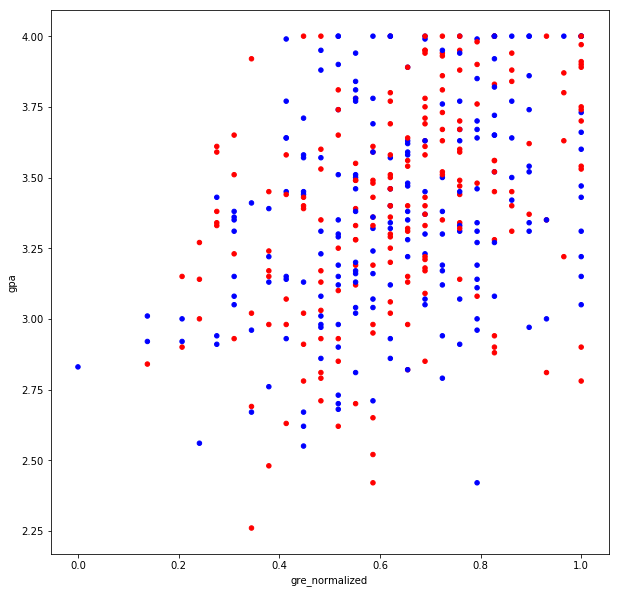

In [427]:
admissions.plot(kind='scatter', x='gre_normalized', y='gpa', figsize=(10,10), c=('red','blue'))

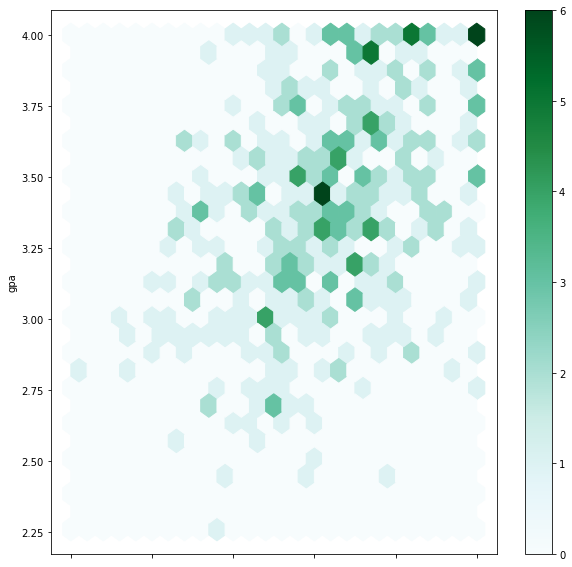

In [428]:
admissions.plot.hexbin(x='gre_normalized', y='gpa', figsize=(10,10), gridsize=25)

>**Question 4:** 

>1. Split the data between a train and test set, with 25% of the data for testing.
>2. Fit a Logistic Regression model on the training data.
>3. Evaluate the model on both the training and testing datasets using the area under the ROC curve.
>4. What's the difference in the AUC score of the training and testing datasets? Is this evidence of overfitting?

In [429]:
admissions.columns.tolist()

['admit',
 'gre',
 'gpa',
 'gre_normalized',
 'prestige_2.0',
 'prestige_3.0',
 'prestige_4.0']

In [459]:
def splitDataset(df, features, target):
    # Create the features matrix
    X = df[features]

    # Create the target vector
    y = df[target]

    # Create training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size=0.25, 
                                                        random_state=1)

    print "Train X:", X_train.shape[0]
    print "Train Y:", y_train.shape[0]
    print "Test X:", X_test.shape[0]
    print "Test Y:", y_test.shape[0]
    return X_train, X_test, y_train, y_test


def printCrossValidation (cls, X,y, model_name):
    print '\n',model_name,':'
    print ' Score:', cls.score(X, y)
    print ' ROC AUC:', cross_val_score(cls, X, y, scoring='roc_auc', cv=5).mean()
    print ' Accuracy:', cross_val_score(cls, X, y, scoring='accuracy', cv=5).mean()
    print ' Recall:', cross_val_score(cls, X, y, scoring='recall', cv=5).mean()
    
    

def fitRandomForest(X, y):
    cls = ensemble.RandomForestClassifier(n_estimators=100) 
    cls.fit(X, y)
    
    cols =  X.columns
    feature_importances = cls.feature_importances_
    features_df = pd.DataFrame({'features': features, 'importance': feature_importances})
    features_df.sort_values('importance', inplace=True, ascending=False)
    
    printCrossValidation (cls, X,y, "Random Forest")
    print ' Feature importance: ',features_df.head(25)
    return cls



def fitKNN(X, y):
    cls = neighbors.KNeighborsClassifier(n_neighbors=10)
    cls.fit(X, y)
    printCrossValidation (cls, X,y, "KNN")
    
    return cls



def fitLogisticRegression(X, y):
    cls = linear_model.LogisticRegression() 
    cls.fit(X, y)
    printCrossValidation (cls, X,y, "Logistic Regression")
    
    return cls

# Logistics Regression

In [445]:
features = ['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']
target = 'admit'
X_train, X_test, y_train, y_test = splitDataset(admissions, features, target)
cls_train = fitLogisticRegression(X_train, y_train)
cls_test = fitLogisticRegression(X_test, y_test)

Train X: 297
Train Y: 297
Test X: 100
Test Y: 100

Logistic Regression :
 Score: 0.703703703704
 ROC AUC: 0.701520748988
 Accuracy: 0.697260861095
 Recall: 0.232631578947

Logistic Regression :
 Score: 0.73
 ROC AUC: 0.484698412698
 Accuracy: 0.709398496241
 Recall: 0.0


# Random Forest

>**Question 5:** 

>Build a KNN model and a Random Forest model trained on this dataset. What's the cross validation score for each? Use roc_auc as your evaluation metric.

In [446]:
features = ['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']
target = 'admit'
X_train, X_test, y_train, y_test = splitDataset(admissions, features, target)
rfcls_train = fitRandomForest(X_train, y_train)
rfcls_test = fitRandomForest(X_test, y_test)

Train X: 297
Train Y: 297
Test X: 100
Test Y: 100
 Feature importance:         features  importance
1           gpa    0.513096
0           gre    0.370877
2  prestige_2.0    0.040619
4  prestige_4.0    0.039040
3  prestige_3.0    0.036368

Random Forest :
 Score: 0.996632996633
 ROC AUC: 0.65162331309
 Accuracy: 0.650539645432
 Recall: 0.354736842105
 Feature importance:         features  importance
1           gpa    0.537075
0           gre    0.335640
2  prestige_2.0    0.055660
3  prestige_3.0    0.046566
4  prestige_4.0    0.025058

Random Forest :
 Score: 0.99
 ROC AUC: 0.501238095238
 Accuracy: 0.67030075188
 Recall: 0.0333333333333


# KNN

In [447]:
features = ['gre_normalized', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']
target = 'admit'
X_train, X_test, y_train, y_test = splitDataset(admissions, features, target)
knncls_train = fitKNN(X_train, y_train)
knncls_test = fitKNN(X_test, y_test)

Train X: 297
Train Y: 297
Test X: 100
Test Y: 100

KNN :
 Score: 0.744107744108
 ROC AUC: 0.633992746289
 Accuracy: 0.704153516462
 Recall: 0.233157894737

KNN :
 Score: 0.75
 ROC AUC: 0.480603174603
 Accuracy: 0.688345864662
 Recall: 0.113333333333


>**Question 6:** 

> What do false positives and false negatives represent in the context of this model? If you work in an admissions department, would you rather have a model that minimizes false negatives or minimizes false positives? Why?

In [448]:
# false postive = a guy doesnt have qualification will be predicted as "admit"
# false negative = a guy does have qualification will be predicted as "no admit"

# I would minimize the false positive

>**Question 7:** 

>Using the Logistic Regression model from Question 4, what is the probability of admission of the following prospective students:

>- Student 1: $GRE = 560$, $GPA = 3.6$, $Prestige = 2$
>- Student 2: $GRE = 750$, $GPA = 3.8$, $Prestige = 4$
>- Student 3: $GRE = 660$, $GPA = 3.1$, $Prestige = 1$

In [449]:

l1 = [[560, 3.6, 1, 0, 0]]
l2 = [[750, 3.8, 0, 0, 1]]
l3 = [[660, 3.1, 0, 0, 0]]

print cls_train.predict_proba(l1)[0,1]
print cls_train.predict_proba(l2)[0,1]
print cls_train.predict_proba(l3)[0,1]


0.407627240389
0.297940823055
0.546985496064


In [450]:
features = ['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']
target = 'admit'
X_train, X_test, y_train, y_test = splitDataset(admissions, features, target)
X_train['predicted'] = cls_train.predict_proba(X_train)[0,1]
X_train['predicted'] = X_train['predicted'].map(lambda x: 1 if x > 0.5 else 0)

Train X: 297
Train Y: 297
Test X: 100
Test Y: 100


In [453]:
from sklearn.metrics import classification_report
y_true = y_train
y_pred = X_train['predicted']
target_names = ['No Admit', 'Admit']
print(classification_report(y_true, y_pred , target_names=target_names))

             precision    recall  f1-score   support

   No Admit       0.67      1.00      0.80       198
      Admit       0.00      0.00      0.00        99

avg / total       0.44      0.67      0.53       297



## Section 2: Mystery Dataset

In this section you will work with a "mystery" supervised classification dataset meaning that you have no context to work with — the names of the features come from San Francisco neighborhoods but aren't actually related to anything having to do with San Francisco.

In this section, we want to devise the best possible model with the fewest number of features. Some of the features are informative, while others are junk. Your task is to find the good ones while dropping the bad ones.

I want you to thoroughly test at least three algorithms in order to find the best one with the best parameters.

In [454]:
data = pd.read_csv('../data/homework_2_data.csv', index_col=[0])
data.head()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
0,-3.126509,7.807749,0.959736,-2.248569,4.557675,1.110156,0.617296,0.356864,0.860267,-0.395962,-1.144975,-1.805742,1.498388,2.157730,1
1,0.941629,2.935495,-0.584966,-0.880963,-1.262072,0.120989,3.970787,2.509629,1.400017,0.574335,-3.389879,-0.898020,0.512079,4.340694,1
2,-0.724688,4.192606,-1.139602,0.856972,0.906893,-2.799484,0.584498,3.468955,1.011336,0.839612,-1.384781,-0.241726,1.502255,-1.539356,1
3,-2.641034,6.963189,0.962412,-0.838858,1.549620,-2.335671,-0.838585,1.924333,2.794306,-0.421610,-1.273275,0.833424,2.268457,-0.004678,0
4,1.259116,4.741797,1.084332,0.186698,4.794145,-1.093006,2.161358,3.264167,-0.060052,1.154145,-2.030773,-1.442986,0.588193,0.533464,1


In [455]:
data.columns.tolist()

['haight',
 'mission',
 'soma',
 'sunset',
 'richmond',
 'glen_park',
 'castro',
 'potrero',
 'hayes_valley',
 'fillmore',
 'bernal',
 'marina',
 'north_beach',
 'excelsior',
 'target']

### Doing SelectKBest to pick the significant features

In [456]:
Xlist = data.columns.tolist()
y = data['target']

#print y
#print X

import sklearn.feature_selection as fes
from sklearn.feature_selection import (chi2,f_regression, f_classif)
lscores = []
for col in Xlist:
    X = data[[col]]
    selector = fes.SelectKBest(f_regression, k='all').fit(X,y)
    x_new = selector.transform(X) # not needed to get the score
    scores = selector.scores_[0]
    lscores.append(scores)


df_score = pd.DataFrame(pd.Series(lscores, index = Xlist))
df_score.sort_values(0, ascending=False, inplace=True)
df_score.head(25)


,0
potrero,165.193914
north_beach,163.417701
richmond,160.929145
castro,145.225710
hayes_valley,129.082735
haight,121.775215
mission,76.459774
excelsior,59.443310
fillmore,3.319861
sunset,2.787440


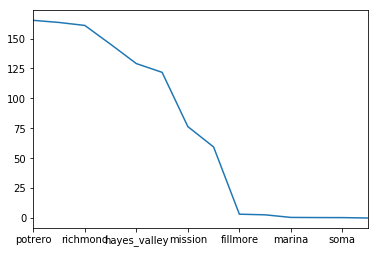

In [457]:
df_score[0].plot()

In [460]:
#potrero, north_beach, richmond, castro, hayes_valley
features = ['potrero', 'north_beach', 'richmond', 'castro', 'hayes_valley','haight', 'mission', 'excelsior']
target = 'target'
X_train, X_test, y_train, y_test = splitDataset(data, features, target)

# logistic regression
cls_train = fitLogisticRegression(X_train, y_train)
cls_test = fitLogisticRegression(X_test, y_test)

# Random Forest
rfcls_train = fitRandomForest(X_train, y_train)
rfcls_test = fitRandomForest(X_test, y_test)

# KNN
knncls_train = fitKNN(X_train, y_train)
knncls_test = fitKNN(X_test, y_test)

Train X: 3000
Train Y: 3000
Test X: 1000
Test Y: 1000

Logistic Regression :
 Score: 0.769
 ROC AUC: 0.816661246651
 Accuracy: 0.766017806531
 Recall: 0.614981225465

Logistic Regression :
 Score: 0.785
 ROC AUC: 0.824622628507
 Accuracy: 0.768987699692
 Recall: 0.615296803653

Random Forest :
 Score: 1.0
 ROC AUC: 0.923809214303
 Accuracy: 0.853681894487
 Recall: 0.75256443079
 Feature importance:         features  importance
1   north_beach    0.157231
2      richmond    0.140503
0       potrero    0.133843
7     excelsior    0.125206
6       mission    0.117135
3        castro    0.111717
5        haight    0.108134
4  hayes_valley    0.106230

Random Forest :
 Score: 1.0
 ROC AUC: 0.907537458128
 Accuracy: 0.833983174579
 Recall: 0.725304414003
 Feature importance:         features  importance
1   north_beach    0.161710
2      richmond    0.157495
0       potrero    0.134921
7     excelsior    0.124742
6       mission    0.108808
3        castro    0.108799
5        haight    0.10